In [277]:
import numpy as np
import math
import matplotlib.pyplot as plt
import astropy
from astropy import constants as const
from astropy import units as u

In [276]:
def rad_calc_frequency(wl, temp):
    # make temp into units of Kelvin
    temp *= u.K 

    # define constants
    h = const.h.value # Planck's 
    k = const.k_B.value # Boltzmann's 
    c = const.c.value  # speed of light

    # convert wavelengths to meters and wavelengths to frequency
    wl_m = wl.to(u.m).value  
    frequency = c / wl_m

    # eval exponent for Planck's law
    exponent = (h * frequency) / (k * temp.value)

    # calculation based on Planck's Law
    spec_rad = ((2 * h * frequency**3) / (c**2) * 
                (1 / (np.exp(exponent) - 1)) * 
                (1e9 / wl_m**2) * (1e-3))

    # convert to kW/(m² · sr · nm)
    spec_rad *= u.kW / (u.m**2 * u.sr * u.nm)

    # return calculation
    return spec_rad

In [275]:
def rad_calc_wavelength(wl, temp):
    # make temp into units of Kelvin
    temp *= u.K     

    # define constants
    h = const.h.value # Planck's 
    k = const.k_B.value # Boltzmann's 
    c = const.c.value  # speed of light

    # convert wavelengths to meters
    wl_m = wl.to(u.m).value  

    # eval exponent for Planck's law
    exponent = (h * c) / (wl_m * k * temp.value)

    # calculate spectral radiance
    spec_rad = (2 * h * c**2) / (wl_m**5) * (1 / (np.exp(exponent) - 1))

    # convert to kW/(m² · sr · nm)
    spec_rad *= (u.kW / (u.m**2 * u.sr * u.nm)) 

    # return calculation
    return spec_rad

In [279]:
# temperatures and wavelengths
temperatures = [3000, 4000, 5000, 5500, 6000]

wavelengths = np.linspace(0.01, 3, 1000) * u.um

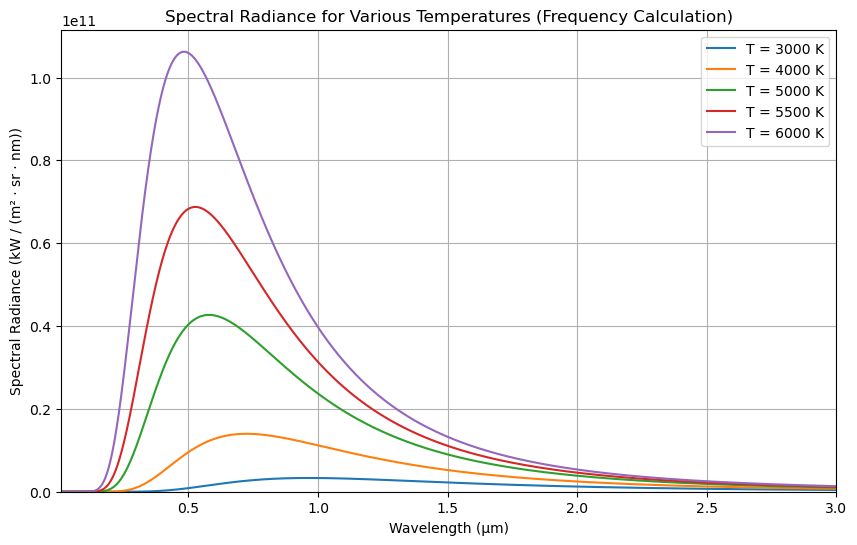

In [280]:
# plot for frequency calculation
plt.figure(figsize=(10, 6))

# for every temperature in a list of temps, create a line on the graph
for temp in temperatures:
    plt.plot(wavelengths.value, rad_calc_frequency(wavelengths, temp).value, label = f'T = {temp} K')

plt.title('Spectral Radiance for Various Temperatures (Frequency Calculation)')
plt.xlabel('Wavelength (µm)')
plt.ylabel('Spectral Radiance (kW / (m² · sr · nm))')
plt.xlim(0.01, 3)
plt.ylim(0, None)
plt.grid()
plt.legend()
plt.show()

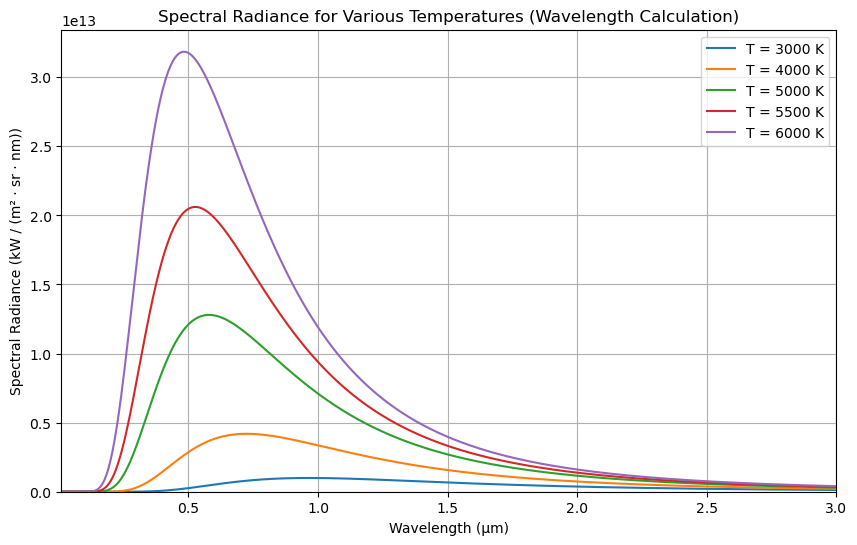

In [282]:
# plot for wavelength calculation
plt.figure(figsize=(10, 6))

# for every temperature in a list of temps, create a line on the graph
for temp in temperatures:
    plt.plot(wavelengths.value, rad_calc_wavelength(wavelengths, temp).value, label=f'T = {temp} K')

plt.title('Spectral Radiance for Various Temperatures (Wavelength Calculation)')
plt.xlabel('Wavelength (µm)')
plt.ylabel('Spectral Radiance (kW / (m² · sr · nm))')
plt.xlim(0.01, 3)
plt.ylim(0, None)
plt.grid()
plt.legend()
plt.show()